In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sp
import scipy.stats as ss
import scipy as sc

# Proof of stake and decentrality

## Share of coins owned by each peer through simulation

Let $p$ be the number of peers and $Z^{(x)}_0$ the number of coins of owned by peer $x\in\{1,\ldots, p\}$ at time $n=0$ and $Z_0 = \sum_x Z^{(x)}_0$ the total number of coins.

We define the processes $(Z_n^{(x)})_{n\geq0}$ and  $(W_n^{(x)})_{n\geq0}$ as the number and proportion of coins of each peer at time $n\geq0$.

1. Consider a network of $p=6$ peers, give them each a number of coins uniformly drawn from the discrete set $\{1,2,\ldots, 5\}$ and plot a bar diagram that shows the proportion of coins owned by each peer. To be clear, we sample 
$$
Z^{(x)}_0\sim\text{unif}(\{1,\ldots, 5\}),\text{ for } x\in\{1,\ldots, p\}
$$
and set 
$$
W^{(x)}_0= \frac{Z^{(x)}_0}{\sum_{i=1}^pZ^{(x)}_0}.
$$

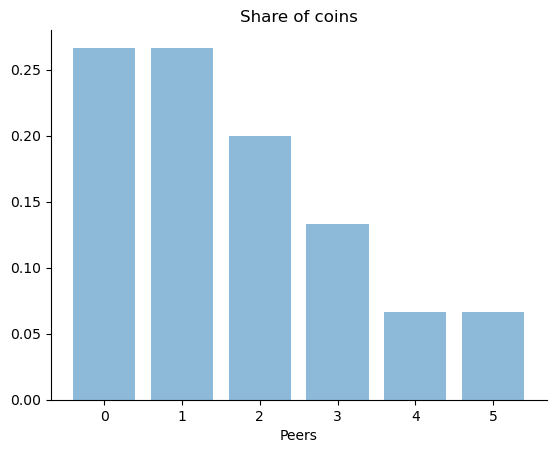

In [2]:
# Initialization of the process
np.random.seed(1234)
p = 6
peers = np.arange(0,p,1)
Y_0 = np.random.randint(low = 1, high = 5, size = p)
N = sum(Y_0)
Z_0 = Y_0 / sum(Y_0)
plt.bar(peers, Z_0, width=0.8, alpha = 0.5)
plt.xticks(peers)
plt.xlabel('Peers')
plt.title('Share of coins')
sns.despine()

When the reward for finding a block is $r=1$ then $(W_n^{(1)},\ldots, W_n^{(p)})$ converges toward a Dirichlet distribution of parameter $Z_0^{i},\text{ }i=1,\ldots, p$. The $i^{th}$ component of $(W_n^{(1)},\ldots, W_n^{(p)})$ then converges toward a Beta distribution of parameter $(Z_0^{(i)},  \sum_{j\neq i}Z_0^{(j)})$. 

2. Sample $1,000$ realizations of $$(W_{100}^{(1)},\ldots, W_{100}^{(p)})$$ and draw the histograms for each component of $W_{100}^{(i)}\text{ for }i = 1, \ldots, p$, add on top the pdf of the beta distribution.

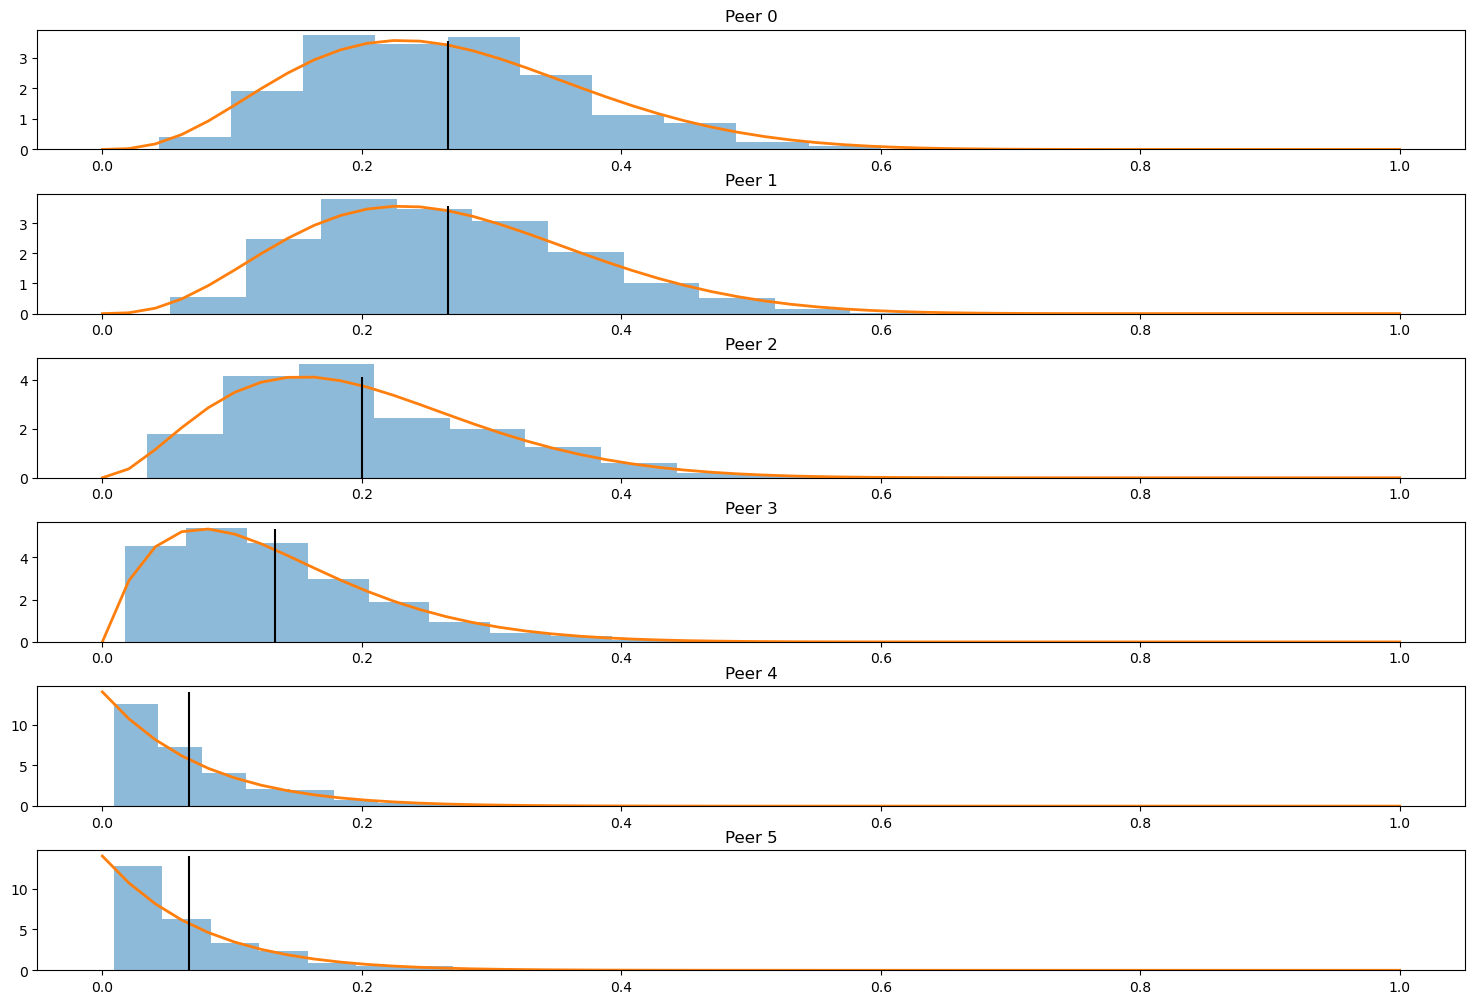

In [3]:
Z_100 = []
for l in range(1000):
    Y_n, Z_n = [Y_0], [Z_0]
    for k in range(100):
        # Vector of reward
        R = np.zeros(p)
        # Reward all equal to 0 except for that selected peer
        R[np.random.choice(peers, 1, p=Z_n[-1])[0]] = 1
        Y_n.append(Y_n[-1] + R)
        Z_n.append(Y_n[-1] / sum(Y_n[-1]))
    Z_100.append(Z_n[-1])
fig, ax = plt.subplots(len(peers), 1, figsize=(15,10))
fig.tight_layout()
for peer in peers:
    ax[peer].hist(np.matrix(Z_100)[:,peer], density=True, alpha = 0.5)
    x = np.linspace(0,1)
    y = ss.beta(Y_0[peer],sum(Y_0) - Y_0[peer]).pdf(x)
    ax[peer].plot(x, y , lw=2)
    ax[peer].vlines(Z_0[peer], ymin = 0, ymax = max(y), color = "black")
    ax[peer].title.set_text("Peer " + str(peer))